# Check out how well a model is performing on different data

This notebook creates a simple model with one regressor for each dataset. This fitted model is then evaluated.

In [17]:
# import packages
import pandas as pd
import importlib
from datetime import datetime, timedelta
import pytz
# import custom modules
import sys
sys.path.append('..')
from ts_forecasting import speccing, modelling, featuring
# useful for reloading after changes were made to the code
importlib.reload(speccing)
importlib.reload(modelling)
importlib.reload(featuring)
%matplotlib inline
PATH_TO_DATA = '../data/pickles'
modelling.MODEL_DIR = "../models"


def day_lags(lags):
    return  [l * 96 for l in lags]

In [24]:
print(datetime(2015, 4, 13, 1, 45))
start = datetime(2015, 4, 13, 1, 45).replace(tzinfo=pytz.utc).astimezone(pytz.timezone("Asia/Seoul"))
print(start)

2015-04-13 01:45:00
2015-04-13 10:45:00+09:00


# Solar production
## With total radiation

ModelSpecs: <{'creation_time': datetime.datetime(2018, 6, 29, 15, 19, 58, 791320, tzinfo=<UTC>),
 'end_of_data': datetime.datetime(2015, 5, 15, 10, 45, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>),
 'horizons': ['6H', '48H'],
 'lags': [-192, -288, -384, -480, -576, -672],
 'model_filename': None,
 'model_type': 'OLS',
 'outcome_var': DFFileSeriesSpecs: <{'column': 'y', 'name': 'solar_production', 'original_tz': None, '__series_type__': 'DFFileSeriesSpecs', 'file_path': '../data/pickles/df_ss_pv_res15T.pickle'}>,
 'ratio_training_test_data': 0.9333333333333333,
 'regressors': [DFFileSeriesSpecs: <{'column': 'y', 'name': 'radiation_forecast_2days_l2', 'original_tz': None, '__series_type__': 'DFFileSeriesSpecs', 'file_path': '../data/pickles/df_total_radiation_res15T.pickle'}>],
 'remodel_frequency': datetime.timedelta(1),
 'start_of_data': datetime.datetime(2015, 4, 13, 10, 45, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>),
 'transform': None}>
Start of training: 2015-04-13 10:45:

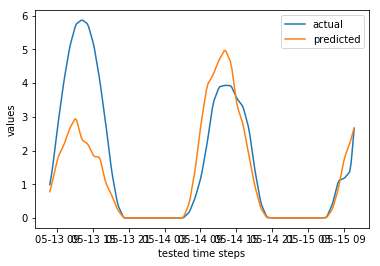

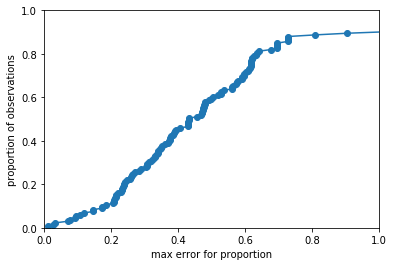

In [28]:
# Describe the model
outcome_var_spec = speccing.DFFileSeriesSpecs("%s/df_ss_pv_res15T.pickle" % PATH_TO_DATA,
                                            column="y", name="solar_production")
regressor_specs = [speccing.DFFileSeriesSpecs("%s/df_total_radiation_res15T.pickle" % PATH_TO_DATA,
                                            column="y", name="radiation_forecast_2days_l2")]
specs = modelling.ModelSpecs(outcome_var=outcome_var_spec,
                             model_type="OLS",
                             lags=day_lags([-2,-3,-4,-5,-6,-7]),
                             regressors=regressor_specs,
                             start_of_data=start,
                             end_of_data=start + timedelta(days=32),
                             ratio_training_test_data=14 / 15,
                             horizons=["6H", "48H"])
print(specs)

# Create and train the model
model = modelling.create_model(specs, "0.1", save=True)

# Evaluate the model
model.summary()
modelling.evaluate_models(m1=(model, specs))

## Without external variables

ModelSpecs: <{'creation_time': datetime.datetime(2018, 6, 29, 15, 43, 56, 703620, tzinfo=<UTC>),
 'end_of_data': datetime.datetime(2015, 5, 15, 10, 45, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>),
 'horizons': ['6H', '48H'],
 'lags': [-192, -288, -384, -480, -576, -672],
 'model_filename': None,
 'model_type': 'OLS',
 'outcome_var': DFFileSeriesSpecs: <{'column': 'y', 'name': 'solar_production', 'original_tz': None, '__series_type__': 'DFFileSeriesSpecs', 'file_path': '../data/pickles/df_ss_pv_res15T.pickle'}>,
 'ratio_training_test_data': 0.9333333333333333,
 'regressors': [],
 'remodel_frequency': datetime.timedelta(1),
 'start_of_data': datetime.datetime(2015, 4, 13, 10, 45, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>),
 'transform': None}>
Start of training: 2015-04-13 10:45:00+09:00
End of training: 2015-05-13 07:30:00+09:00
DatetimeIndex(['2015-01-01 00:00:00+09:00', '2015-01-01 00:15:00+09:00',
               '2015-01-01 00:30:00+09:00', '2015-01-01 00:45:00+09:00',
   

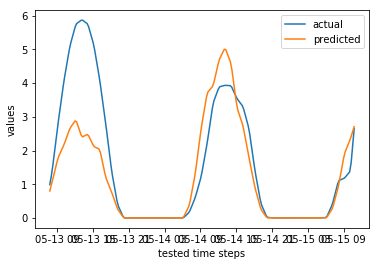

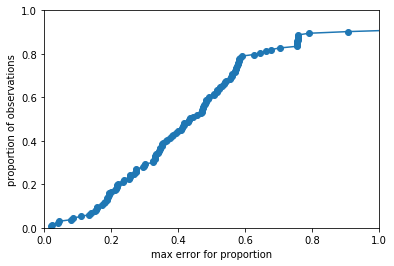

In [29]:
# Describe the model
outcome_var_spec = speccing.DFFileSeriesSpecs("%s/df_ss_pv_res15T.pickle" % PATH_TO_DATA,
                                            column="y", name="solar_production")
regressor_specs = None
specs = modelling.ModelSpecs(outcome_var=outcome_var_spec,
                             model_type="OLS",
                             lags=day_lags([-2,-3,-4,-5,-6,-7]),
                             regressors=regressor_specs,
                             start_of_data=start,
                             end_of_data=start + timedelta(days=32),
                             ratio_training_test_data=14 / 15,
                             horizons=["6H", "48H"])
print(specs)

# Create and train the model
model = modelling.create_model(specs, "0.1")

# Evaluate the model
model.summary()
modelling.evaluate_models(m1=(model, specs))

# Building consumption
## With temperature

ModelSpecs: <{'creation_time': datetime.datetime(2018, 6, 29, 15, 45, 32, 797103, tzinfo=<UTC>),
 'end_of_data': datetime.datetime(2015, 5, 15, 10, 45, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>),
 'horizons': ['6H', '48H'],
 'lags': [-192, -288, -384, -480, -576, -672],
 'model_filename': None,
 'model_type': 'OLS',
 'outcome_var': DFFileSeriesSpecs: <{'column': 'y', 'name': 'building_consumption', 'original_tz': None, '__series_type__': 'DFFileSeriesSpecs', 'file_path': '../data/pickles/df_jeju_dream_tower_res15T.pickle'}>,
 'ratio_training_test_data': 0.9333333333333333,
 'regressors': [DFFileSeriesSpecs: <{'column': 'y', 'name': 'temperature_forecast_2days_l2', 'original_tz': None, '__series_type__': 'DFFileSeriesSpecs', 'file_path': '../data/pickles/df_temperature_res15T.pickle'}>],
 'remodel_frequency': datetime.timedelta(1),
 'start_of_data': datetime.datetime(2015, 4, 13, 10, 45, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>),
 'transform': None}>
Start of training: 2015

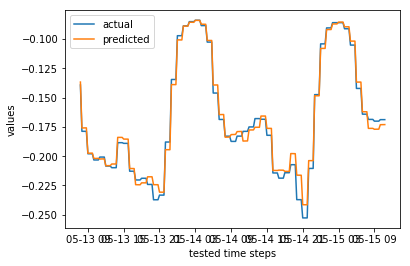

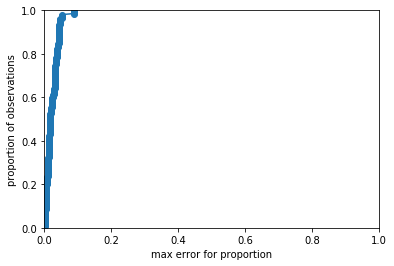

In [30]:
# Describe the model
outcome_var_spec = speccing.DFFileSeriesSpecs("%s/df_jeju_dream_tower_res15T.pickle" % PATH_TO_DATA,
                                            column="y", name="building_consumption")
regressor_specs = [speccing.DFFileSeriesSpecs("%s/df_temperature_res15T.pickle" % PATH_TO_DATA,
                                            column="y", name="temperature_forecast_2days_l2")]
specs = modelling.ModelSpecs(outcome_var=outcome_var_spec,
                             model_type="OLS",
                             lags=day_lags([-2,-3,-4,-5,-6,-7]),
                             regressors=regressor_specs,
                             start_of_data=start,
                             end_of_data=start + timedelta(days=32),
                             ratio_training_test_data=14 / 15,
                             horizons=["6H", "48H"])
print(specs)

# Create and train the model
model = modelling.create_model(specs, "0.1")

# Evaluate the model
model.summary()
modelling.evaluate_models(m1=(model, specs))

## Without external variables

In [ ]:
# Describe the model
outcome_var_spec = speccing.DFFileSeriesSpecs("%s/df_jeju_dream_tower_res15T.pickle" % PATH_TO_DATA,
                                            column="y", name="building_consumption")
regressor_specs = None
specs = modelling.ModelSpecs(outcome_var=outcome_var_spec,
                             model_type="OLS",
                             lags=day_lags([-2,-3,-4,-5,-6,-7]),
                             regressors=regressor_specs,
                             start_of_data=start,
                             end_of_data=start + timedelta(days=32),
                             ratio_training_test_data=14 / 15,
                             horizons=["6H", "48H"])
print(specs)

# Create and train the model
model = modelling.create_model(specs, "0.1")

# Evaluate the model
model.summary()
modelling.evaluate_models(m1=(model, specs))

# Wind production
## With wind speed

In [ ]:
# Describe the model
outcome_var_spec = speccing.DFFileSeriesSpecs("%s/df_kl-offshore_res15T.pickle" % PATH_TO_DATA,
                                            column="y", name="building_consumption")
regressor_specs = [speccing.DFFileSeriesSpecs("%s/df_wind_speed_res15T.pickle" % PATH_TO_DATA,
                                            column="y", name="windspeed_forecast_2days_l2")]
specs = modelling.ModelSpecs(outcome_var=outcome_var_spec,
                             model_type="OLS",
                             lags=day_lags([-2,-3,-4,-5,-6,-7]),
                             regressors=regressor_specs,
                             start_of_data=start,
                             end_of_data=start + timedelta(days=32),
                             ratio_training_test_data=14 / 15,
                             horizons=["6H", "48H"])
print(specs)

# Create and train the model
model = modelling.create_model(specs, "0.1")

# Evaluate the model
model.summary()
modelling.evaluate_models(m1=(model, specs))

## Without external variables

In [ ]:
# Describe the model
outcome_var_spec = speccing.DFFileSeriesSpecs("%s/df_kl-offshore_res15T.pickle" % PATH_TO_DATA,
                                            column="y", name="building_consumption")
regressor_specs = None
specs = modelling.ModelSpecs(outcome_var=outcome_var_spec,
                             model_type="OLS",
                             lags=day_lags([-2,-3,-4,-5,-6,-7]),
                             regressors=regressor_specs,
                             start_of_data=start,
                             end_of_data=start + timedelta(days=32),
                             ratio_training_test_data=14 / 15,
                             horizons=["6H", "48H"])
print(specs)

# Create and train the model
model = modelling.create_model(specs, "0.1")

# Evaluate the model
model.summary()
modelling.evaluate_models(m1=(model, specs))

# Charging station consumption
## Without external variables

In [ ]:
# Describe the model
outcome_var_spec = speccing.DFFileSeriesSpecs("%s/df_48_l_res15T.pickle" % PATH_TO_DATA,
                                            column="y", name="charging_station_consumption")
regressor_specs = None
specs = modelling.ModelSpecs(outcome_var=outcome_var_spec,
                             model_type="OLS",
                             lags=day_lags([-2,-3,-4,-5,-6,-7]),
                             regressors=regressor_specs,
                             start_of_data=start,
                             end_of_data=start + timedelta(days=32),
                             ratio_training_test_data=14 / 15,
                             horizons=["6H", "48H"])
print(specs)

# Create and train the model
model = modelling.create_model(specs, "0.1")

# Evaluate the model
model.summary()
modelling.evaluate_models(m1=(model, specs))